# Predicting the House price

In [437]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [438]:
data=pd.read_csv('train.csv')
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [439]:
# SalePrice - the property's sale price in dollars.                 # MSSubClass: The building class
# MSZoning: The general zoning classification                       # LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet                                  # Street: Type of road access                                       # Alley: Type of alley access
# LotShape: General shape of property                               # LandContour: Flatness of the property
# Utilities: Type of utilities available                            # LotConfig: Lot configuration
# LandSlope: Slope of property                                      # Neighborhood: Physical locations within Ames city limits
# Condition1: Proximity to main road or railroad                    # Condition2: Proximity to main road or railroad (if a second is present)
# BldgType: Type of dwelling                                        # HouseStyle: Style of dwelling
# OverallQual: Overall material and finish quality                  # OverallCond: Overall condition rating
# YearBuilt: Original construction date                             # YearRemodAdd: Remodel date
# RoofStyle: Type of roof                                           # RoofMatl: Roof material
# Exterior1st: Exterior covering on house                           # Exterior2nd: Exterior covering on house (if more than one material)
# MasVnrType: Masonry veneer type                                   # MasVnrArea: Masonry veneer area in square feet
# ExterQual: Exterior material quality                              # ExterCond: Present condition of the material on the exterior
# Foundation: Type of foundation                                    # BsmtQual: Height of the basement
# BsmtCond: General condition of the basement                       # BsmtExposure: Walkout or garden level basement walls
# BsmtFinType1: Quality of basement finished area                   # BsmtFinSF1: Type 1 finished square feet
# BsmtFinType2: Quality of second finished area (if present)        # BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area                # TotalBsmtSF: Total square feet of basement area
# Heating: Type of heating                                          # HeatingQC: Heating quality and condition
# CentralAir: Central air conditioning                              # Electrical: Electrical system
# 1stFlrSF: First Floor square feet                                 # 2ndFlrSF: Second floor square feet
# LowQualFinSF: Low quality finished square feet (all floors)       # GrLivArea: Above grade (ground) living area square feet
# BsmtFullBath: Basement full bathrooms                             # BsmtHalfBath: Basement half bathrooms
# FullBath: Full bathrooms above grade                              # HalfBath: Half baths above grade
# Bedroom: Number of bedrooms above basement level                  # Kitchen: Number of kitchens
# KitchenQual: Kitchen quality                                   # TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# Functional: Home functionality rating                            # Fireplaces: Number of fireplaces
# FireplaceQu: Fireplace quality                                   # GarageType: Garage location
# GarageYrBlt: Year garage was built                               # GarageFinish: Interior finish of the garage 
# GarageCars: Size of garage in car capacity                       # GarageArea: Size of garage in square feet
# GarageQual: Garage quality          # GarageCond: Garage condition             # PavedDrive: Paved driveway
# WoodDeckSF: Wood deck area in square feet                        # OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet                # 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet                    # PoolArea: Pool area in square feet
# PoolQC: Pool quality       # Fence: Fence quality     # MiscFeature: Miscellaneous feature not covered in other categories
# MiscVal: $Value of miscellaneous feature          # MoSold: Month Sold         # YrSold: Year Sold
# SaleType: Type of sale                                                
# SaleCondition: Condition of sale

In [440]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [441]:

print("The number of columns are {} and number of rows are {} ".format(data.shape[1],data.shape[0]))

The number of columns are 81 and number of rows are 1460 


In [442]:
data.describe(include=np.object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [443]:
print("Data has {} Columns having null value".format(data.isnull().any().sum()))

Data has 19 Columns having null value


In [444]:
print("MsZone is {} Street's are {} Alley are {} ".format(data.MSZoning.unique(),data.Street.unique(),data.Alley.unique()))
print("Lotshape is {} Land contor are {} utilities are {} ".format(data.LotShape.unique(),data.LandContour.unique(),data.Utilities.unique()))
print("Lotconfig is {} LandSlope are {}  \n GarageFinish are {} ".format(data.LotConfig.unique(),data.LandSlope.unique(),data.GarageFinish.unique()))



MsZone is ['RL' 'RM' 'C (all)' 'FV' 'RH'] Street's are ['Pave' 'Grvl'] Alley are [nan 'Grvl' 'Pave'] 
Lotshape is ['Reg' 'IR1' 'IR2' 'IR3'] Land contor are ['Lvl' 'Bnk' 'Low' 'HLS'] utilities are ['AllPub' 'NoSeWa'] 
Lotconfig is ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] LandSlope are ['Gtl' 'Mod' 'Sev']  
 GarageFinish are ['RFn' 'Unf' 'Fin' nan] 


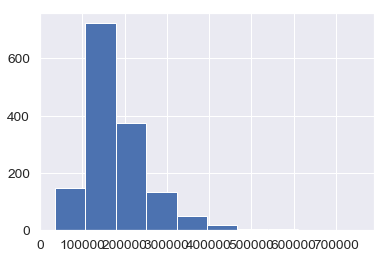

In [445]:
data.SalePrice.hist()

C:\Users\Rahul jadli\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


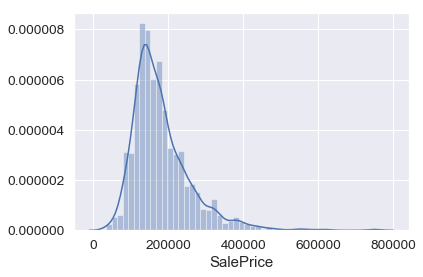

In [446]:
sns.distplot(data['SalePrice']);

In [447]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


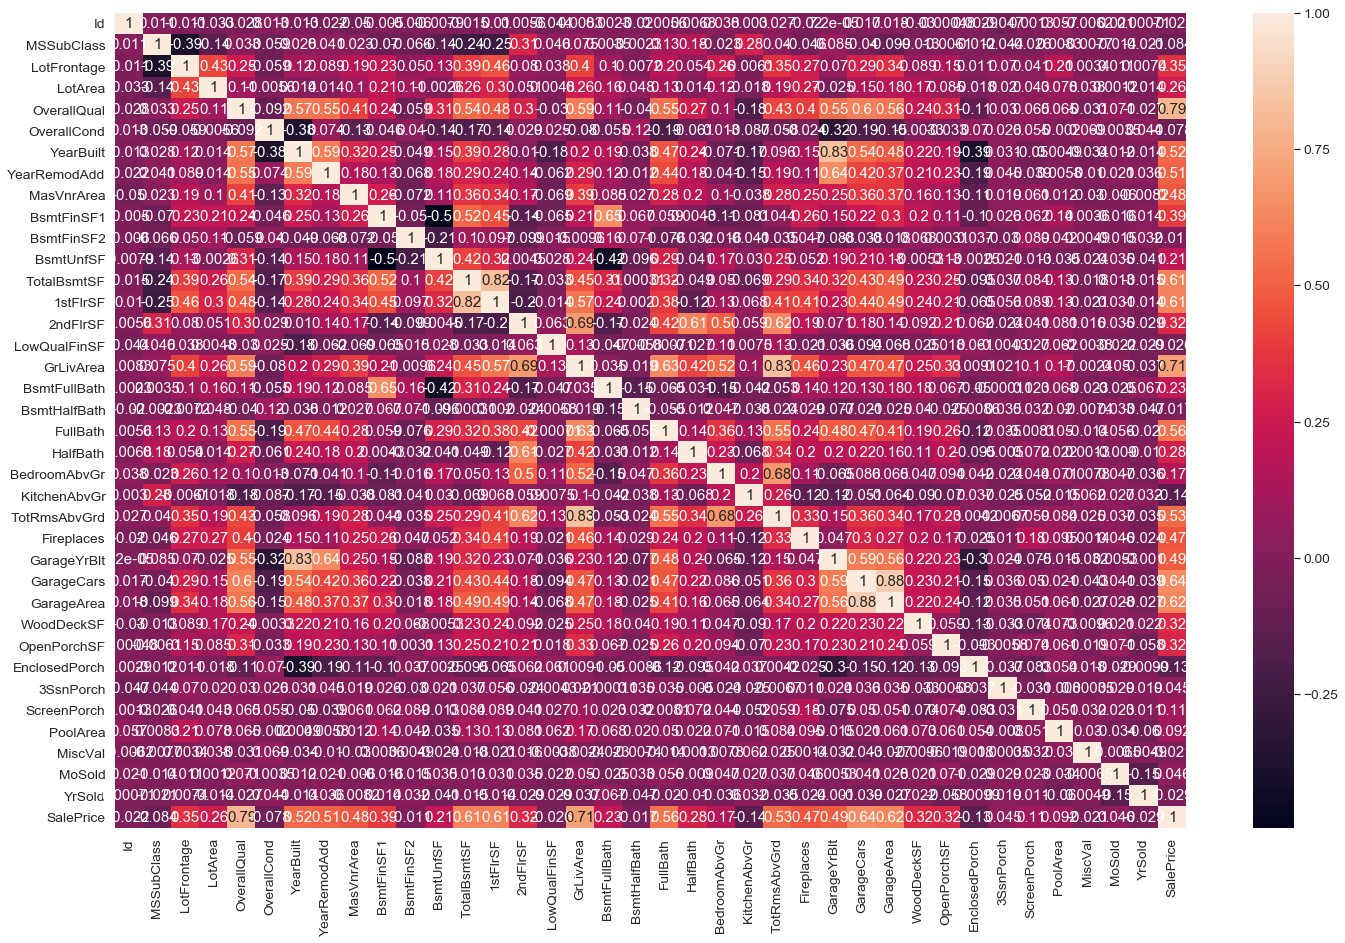

In [448]:
plt.figure(figsize=(24,15))
sns.heatmap(data.corr(),annot=True)

### Salesprice has high relationship with Overallqual, year, yearrenew, Masvin,totalbsmt,1stfirsf,Girlivarea,Fullbath,Totalrmsabv,Fireplace,Garageyer,Garagecar,GarageArea

### Salesprice has high relationship lotfront,lotarea,bsmtsf1,2ndfirsf,bsmtfullbath,bsmthalfbath,halfbath,bedroomabv,wooddeck,Openporch,

### Salesprice has Low relationship  bsmtfinsfinSF2,lowQualFinsSF,Bsmthalfbath,Screenporch,Poolarea,Miscval,Mosold,Yrsold


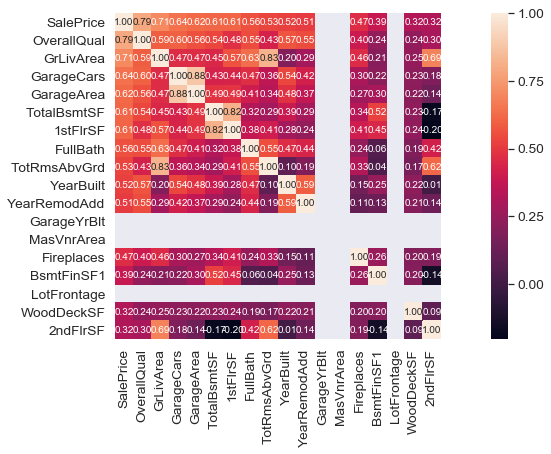

In [449]:
k=18
plt.figure(figsize=(18,6))
correlation_data=data.corr()
cols = correlation_data.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [450]:
correlation_data.nlargest(k, 'SalePrice')['SalePrice'].index


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF'], dtype='object')

### Data Visualization

### Continous variable-Saleprice, GrLivArea,GarageArea TotalbsmtSF, 1StFloor, YearBuild, YearRemodAdd , GarageYrBlt,  MasVnrArea, BsmtFinSF1
### Categorical variable- GarageCars, Fullbath, TotRmsAbvGrd,OverallQuad,Fireplaces

# Scatter Plots

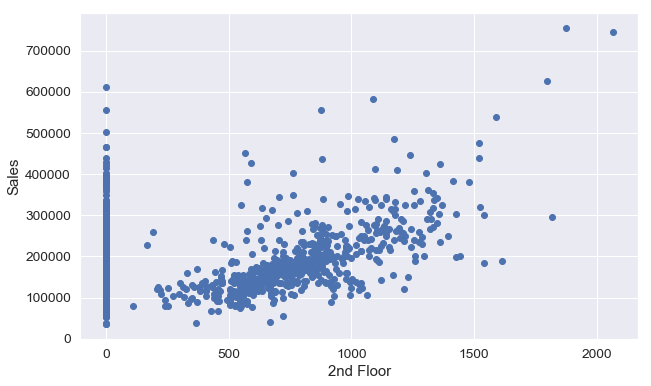

In [451]:
plt.figure(figsize=(10,6))
plt.scatter(data['2ndFlrSF'],data.SalePrice)
plt.xlabel("2nd Floor")
plt.ylabel("Sales")
plt.show()

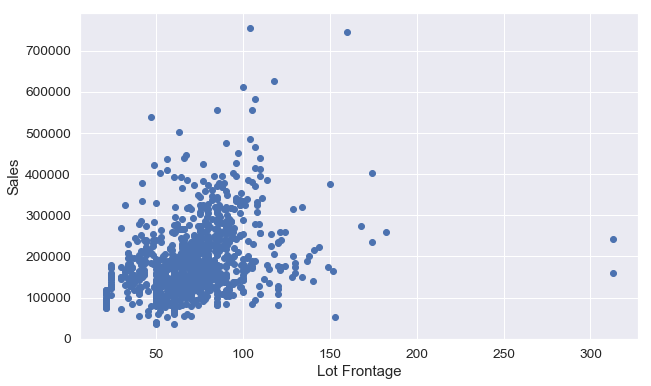

In [452]:
plt.figure(figsize=(10,6))
plt.scatter(data.LotFrontage,data.SalePrice)
plt.xlabel("Lot Frontage")
plt.ylabel("Sales")
plt.show()

In [453]:
data.sort_values(by='BsmtFinSF1',ascending=False)[:4]
data=data.drop(data[data.Id==1183].index)
# data=data.drop(data[data.Id==899].index)

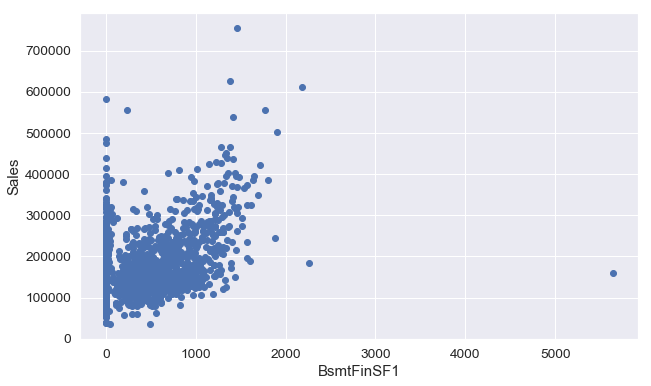

In [454]:
plt.figure(figsize=(10,6))
plt.scatter(data.BsmtFinSF1,data.SalePrice)
plt.xlabel("BsmtFinSF1")
plt.ylabel("Sales")
plt.show()

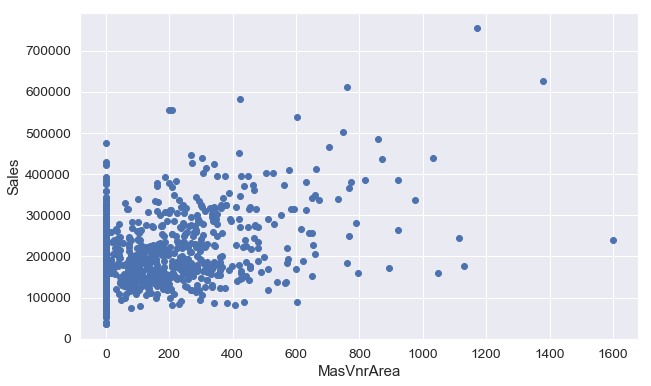

In [455]:
plt.figure(figsize=(10,6))
plt.scatter(data.MasVnrArea,data.SalePrice)
plt.xlabel("MasVnrArea")
plt.ylabel("Sales")
plt.show()

In [456]:
# Here We can remove this outlier's from the data but this time we will leave them.
data[data.SalePrice>600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


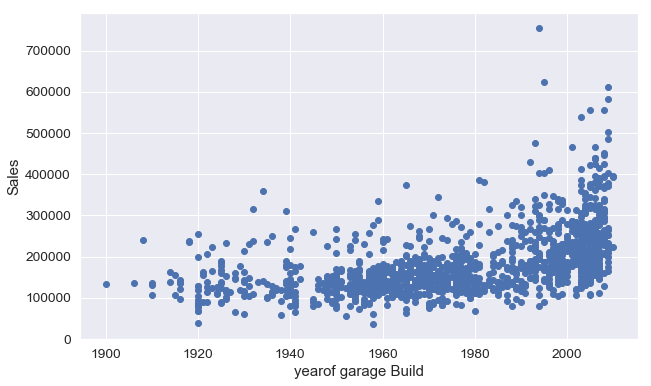

In [457]:
plt.figure(figsize=(10,6))
plt.scatter(data.GarageYrBlt,data.SalePrice)
plt.xlabel("yearof garage Build")
plt.ylabel("Sales")
plt.show()

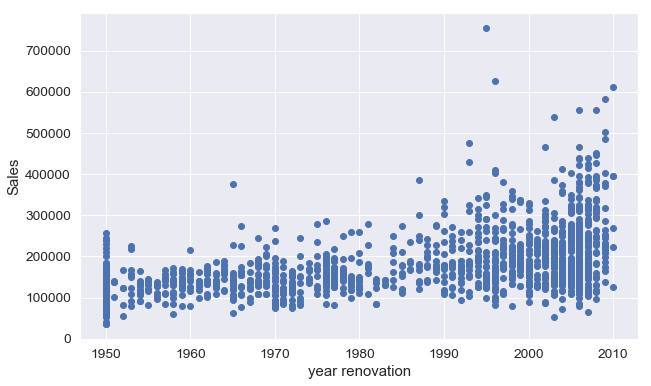

In [458]:
plt.figure(figsize=(10,6))
plt.scatter(data.YearRemodAdd,data.SalePrice)
plt.xlabel("year renovation")
plt.ylabel("Sales")
plt.show()

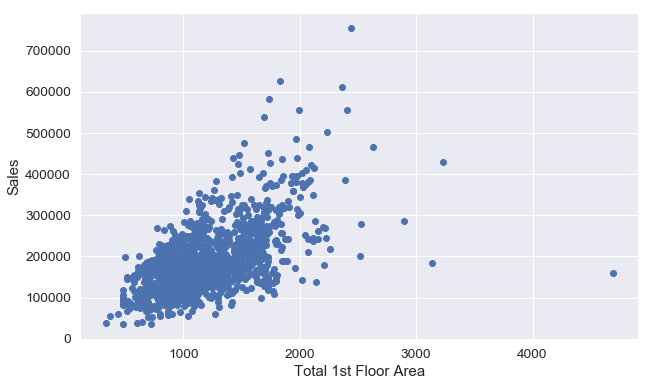

In [459]:
plt.figure(figsize=(10,6))
plt.scatter(data['1stFlrSF'],data.SalePrice)
plt.xlabel("Total 1st Floor Area")
plt.ylabel("Sales")
plt.show()

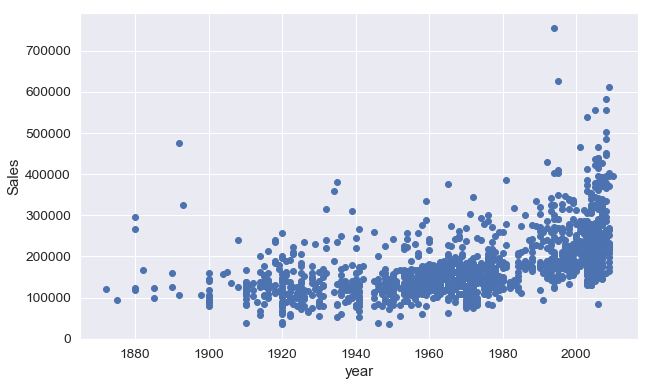

In [460]:
plt.figure(figsize=(10,6))
plt.scatter(data.YearBuilt,data.SalePrice)
plt.xlabel("year")
plt.ylabel("Sales")
plt.show()

### Here Also We See One Value Not Following The Trend We Can Remove It.

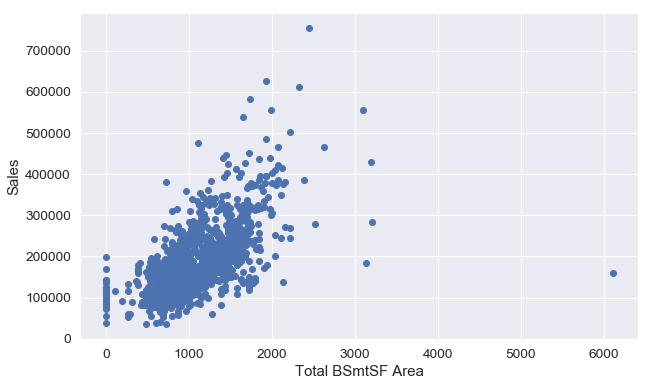

In [461]:
plt.figure(figsize=(10,6))
plt.scatter(data.TotalBsmtSF,data.SalePrice)
plt.xlabel("Total BSmtSF Area")
plt.ylabel("Sales")
plt.show()

In [462]:
data.sort_values(by='TotalBsmtSF',ascending=False)[:1].index

Int64Index([1298], dtype='int64')

In [463]:
data=data.drop(data[data['Id']==1299].index)

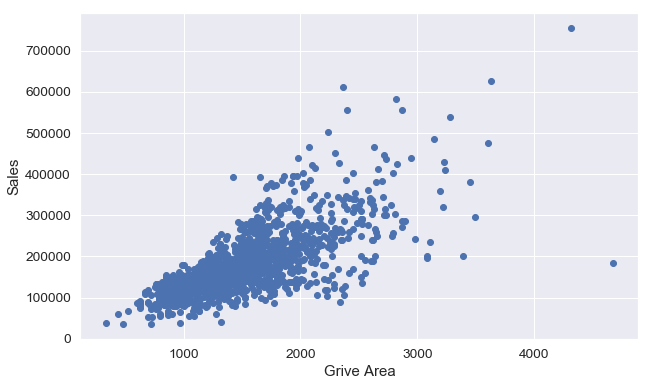

In [464]:
plt.figure(figsize=(10,6))
plt.scatter(data.GrLivArea,data.SalePrice)
plt.xlabel("Grive Area")
plt.ylabel("Sales")
plt.show()

##### Here Two Values are varry much deviating from the trend ,we can remove them,above we have removed them also.
##### But first getting the index and then dropping those rows

In [465]:
data.sort_values(by='GrLivArea',ascending=False)[:2].index

Int64Index([523, 691], dtype='int64')

In [466]:
# data=data.drop(data[data['Id']==1299].index)
data=data.drop(data[data['Id']==524].index)

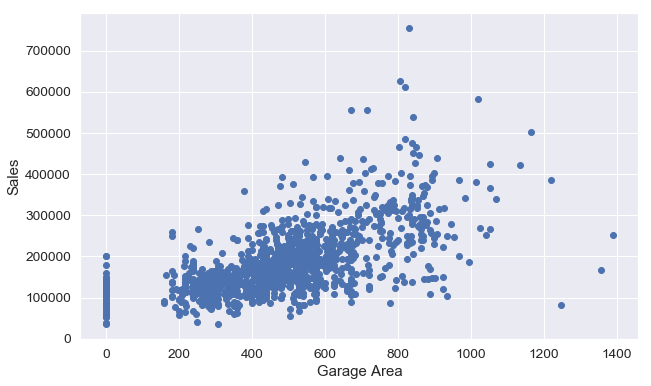

In [467]:
plt.figure(figsize=(10,6))
plt.scatter(data.GarageArea,data.SalePrice)
plt.xlabel("Garage Area")
plt.ylabel("Sales")
plt.show()

In [468]:
# GarageCars, Fullbath, TotRmsAbvGrd,OverallQuad,Fireplaces

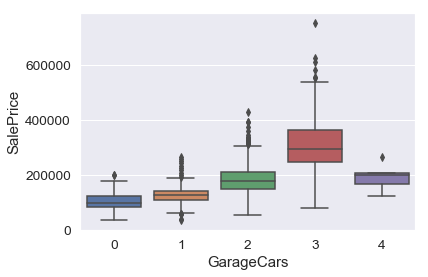

In [469]:
sns.boxplot(data.GarageCars,data.SalePrice)

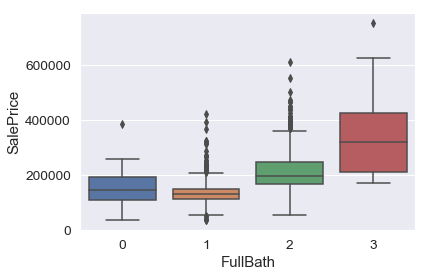

In [470]:
sns.boxplot(data.FullBath,data.SalePrice)

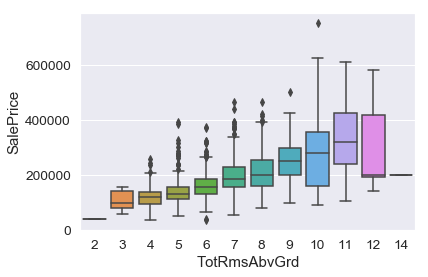

In [471]:
sns.boxplot(data.TotRmsAbvGrd,data.SalePrice)

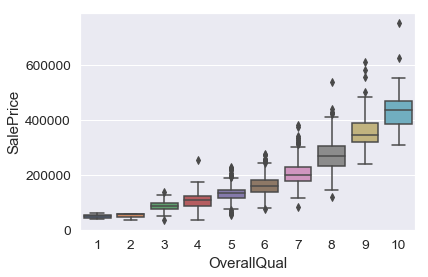

In [472]:
sns.boxplot(data.OverallQual,data.SalePrice)

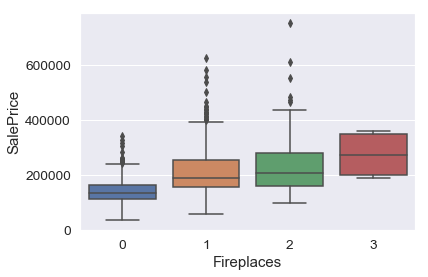

In [473]:
sns.boxplot(data.Fireplaces,data.SalePrice)

In [474]:
data.describe(include=np.object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1457,1457,91,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1449,1457,1457,1457,1420,1420,1419,1420,1419,1457,1457,1457,1456,1457,1457,767,1376,1376,1376,1376,1457,5,280,54,1457,1457
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1148,1451,50,925,1310,1456,1051,1379,225,1259,1443,1217,726,1141,1432,515,504,863,906,1279,644,649,1308,953,430,1253,1425,738,1362,1331,735,1357,378,868,605,1308,1323,1337,2,156,49,1266,1198


In [475]:
print(data.Street.unique(),data.Street.isnull().any())
print(data.Alley.value_counts(),data.Alley.isnull().sum())
print(data.Utilities.unique(),data.Utilities.isnull().any())
print(data.LotShape.unique(),data.LotShape.isnull().any())
print(data.LandContour.unique(),data.LandContour.isnull().any())
print(data.LandSlope.unique(),data.LandSlope.isnull().any())
print(data.Condition1.unique(),data.Condition1.isnull().any())
print(data.Condition2.unique(),data.Condition2.isnull().any())

['Pave' 'Grvl'] False
Grvl    50
Pave    41
Name: Alley, dtype: int64 1366
['AllPub' 'NoSeWa'] False
['Reg' 'IR1' 'IR2' 'IR3'] False
['Lvl' 'Bnk' 'Low' 'HLS'] False
['Gtl' 'Mod' 'Sev'] False
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] False
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe'] False


### Here as Alley has around 1365 null value we can't leave all row's , we might have to fill some of it's rows or drop that column.

In [476]:
# data.Alley=data.Alley.fillna('Grvl')

In [477]:
street={'Pave':0, 'Grvl':1}
alley={'Grvl':0,'Pave':1}
utilities={'AllPub':0, 'NoSeWa':1}
shape={'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3}
contour={'Lvl':0 ,'Bnk':1, 'Low':2, 'HLS':3}
slope={'Gtl':0, 'Mod':1, 'Sev':2}
condition1={'Norm':0 ,'Feedr':1, 'PosN':2, 'Artery':3 ,'RRAe':4 ,'RRNn':5 ,'RRAn':6 ,'PosA':7, 'RRNe':8}
condition2={'Norm':0, 'Artery':1 ,'RRNn':2, 'Feedr':3 ,'PosA':4, 'PosN':5 ,'RRAn':6, 'RRAe':7}


In [478]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data.describe(include=np.object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1457,1457,91,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1449,1457,1457,1457,1420,1420,1419,1420,1419,1457,1457,1457,1456,1457,1457,767,1376,1376,1376,1376,1457,5,280,54,1457,1457
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1148,1451,50,925,1310,1456,1051,1379,225,1259,1443,1217,726,1141,1432,515,504,863,906,1279,644,649,1308,953,430,1253,1425,738,1362,1331,735,1357,378,868,605,1308,1323,1337,2,156,49,1266,1198


In [479]:
print(data.BldgType.unique(),data.BldgType.isnull().any())
print(data.HouseStyle.unique(),data.HouseStyle.isnull().sum())
print(data.RoofMatl.unique(),data.RoofMatl.isnull().any())
print(data.MasVnrType.unique(),data.MasVnrType.isnull().any())
print(data.ExterQual.unique(),data.ExterQual.isnull().any())
print(data.ExterCond.unique(),data.ExterCond.isnull().any())
print(data.BsmtQual.unique(),data.BsmtQual.isnull().any())
print(data.BsmtCond.unique(),data.BsmtCond.isnull().any())
print(data.BsmtExposure.unique(),data.BsmtExposure.isnull().any())
print(data.BsmtFinType1.unique(),data.BsmtFinType1.isnull().any())
print(data.BsmtFinType2.unique(),data.BsmtFinType2.isnull().any())
print(data.Heating.unique(),data.Heating.isnull().any())
print(data.HeatingQC.unique(),data.HeatingQC.isnull().any())

['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] False
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 0
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'] False
['BrkFace' 'None' 'Stone' 'BrkCmn' nan] True
['Gd' 'TA' 'Ex' 'Fa'] False
['TA' 'Gd' 'Fa' 'Po' 'Ex'] False
['Gd' 'TA' 'Ex' nan 'Fa'] True
['TA' 'Gd' nan 'Fa' 'Po'] True
['No' 'Gd' 'Mn' 'Av' nan] True
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ'] True
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ'] True
['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor'] False
['Ex' 'Gd' 'TA' 'Fa' 'Po'] False


### As You can see it, its not a correct way to convert them to categorical as many of the column's have more than 50% value as empty, as we have only examnined few of them 
## We will follow the rule if column has more than 20% missing value we will drove the column

In [480]:
pd.set_option('display.max_rows',100)
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1452,0.996568
MiscFeature,1403,0.962938
Alley,1366,0.937543
Fence,1177,0.807824
FireplaceQu,690,0.473576
LotFrontage,259,0.177763
GarageCond,81,0.055594
GarageType,81,0.055594
GarageYrBlt,81,0.055594
GarageFinish,81,0.055594


In [481]:
data=data.drop(['PoolQC','Alley','Fence','FireplaceQu','LotFrontage','MiscFeature'],axis=1)

In [482]:
pd.set_option('display.max_rows', 500)

data.isnull().sum()>1

Id               False
MSSubClass       False
MSZoning         False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF         False
2ndFlrSF         False
LowQualFinS

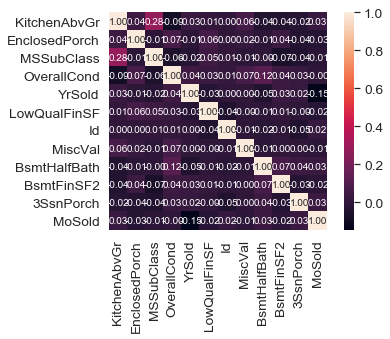

In [483]:
c=correlation_data.nsmallest(12, 'SalePrice')['SalePrice'].index
cs = np.corrcoef(data[c].values.T)
sns.heatmap(cs,annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=c.values, xticklabels=c.values)

In [484]:
correlation_data.nsmallest(15, 'SalePrice')['SalePrice'].index

Index(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold', 'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch', 'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr'], dtype='object')

In [485]:
data=data.drop(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2', '3SsnPorch', 'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr'],axis=1)

## As Now the size of columns has reduced to 60 from 81

In [486]:
data.shape[1]

61

#### Below are the columns which have null values in them.

In [487]:
print(data.MasVnrType.value_counts())        
print(data.MasVnrArea.mean())        
print(data.BsmtQual.value_counts())          
print(data.BsmtCond.value_counts())          
print(data.BsmtExposure.value_counts())      
print(data.BsmtFinType1.value_counts())     
print(data.BsmtFinType2.value_counts())      
print(data.GarageType.value_counts())        
print(data.GarageYrBlt.mean())       
print(data.GarageFinish.value_counts)      
print(data.GarageQual.value_counts)        
print(data.GarageCond.value_counts)        

None       863
BrkFace    445
Stone      126
BrkCmn      15
Name: MasVnrType, dtype: int64
102.82470669427191
TA    649
Gd    618
Ex    118
Fa     35
Name: BsmtQual, dtype: int64
TA    1308
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    953
Av    220
Gd    132
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    415
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    1253
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Attchd     868
Detchd     387
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
1978.4513081395348
<bound method IndexOpsMixin.value_counts of 0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
5       Unf
6       RFn
7       RFn
8       Unf
9       RFn
10      Unf
11      Fin
12      Unf
13      RFn
14      RFn
15      Unf
16      Fin
17      Unf
18      Unf
19      Unf
20      RFn
21      Unf
22      RFn
23      Unf

In [488]:
data.isnull().any()

Id               False
MSZoning         False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF         False
2ndFlrSF         False
GrLivArea        False
BsmtFullBath     False
FullBath         False
HalfBath   

In [489]:
new_data=data[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
        'WoodDeckSF', '2ndFlrSF']]

In [490]:
data.describe(include=np.object).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [491]:
data[['BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']].head(7)

,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
6,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [492]:
data.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

##### Dropping this neighborhood colum

In [493]:
# data.drop(['Neighborhood','Exterior1st'],axis=1,inplace=True)

## Either we can use below thing or we can convert them directly using Sklearn Label Encoder

In [494]:
neighborhood={'CollgCr':1, 'Veenker':2, 'Crawfor':3, 'NoRidge':4, 'Mitchel':5, 'Somerst':6,
       'NWAmes':7, 'OldTown':8, 'BrkSide':9, 'Sawyer':10, 'NridgHt':11, 'NAmes':12,
       'SawyerW':13, 'IDOTRR':14, 'MeadowV':15, 'Edwards':16, 'Timber':17, 'Gilbert':18,
       'StoneBr':19, 'ClearCr':20, 'NPkVill':21, 'Blmngtn':22, 'BrDale':23, 'SWISU':24,
       'Blueste':25}
roof_style={'Gable':0, 'Hip':1, 'Gambrel':2, 'Mansard':3, 'Flat':4, 'Shed':5}
zone={'RL':0, 'RM':1, 'C (all)':2, 'FV':3, 'RH':4}
building={'1Fam':0, '2fmCon':1, 'Duplex':2, 'TwnhsE':3, 'Twnhs':4}
config={'Inside':0, 'FR2':1, 'Corner':2, 'CulDSac':3, 'FR3':4}
street={'Pave':0, 'Grvl':1}
utilities={'AllPub':0, 'NoSeWa':1}
shape={'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3}
contour={'Lvl':0 ,'Bnk':1, 'Low':2, 'HLS':3}
slope={'Gtl':0, 'Mod':1, 'Sev':2}
condition1={'Norm':0 ,'Feedr':1, 'PosN':2, 'Artery':3 ,'RRAe':4 ,'RRNn':5 ,'RRAn':6 ,'PosA':7, 'RRNe':8}
condition2={'Norm':0, 'Artery':1 ,'RRNn':2, 'Feedr':3 ,'PosA':4, 'PosN':5 ,'RRAn':6, 'RRAe':7}


## As neighborhood can be a factor so we can check its empact.

In [495]:
neighbor=data.groupby('Neighborhood')['SalePrice'].mean()
x=neighbor.sort_values(ascending=False)
print(x)

Neighborhood
NoRidge    325052.700000
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    127318.571429
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64


In [496]:
neighbor=data.groupby('Neighborhood')['SalePrice'].mean()
x=neighbor.sort_values(ascending=False)
print(x)

Neighborhood
NoRidge    325052.700000
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    127318.571429
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64


### removing some categorical columns

In [497]:
data.drop(['GarageQual','BsmtExposure','BsmtFinType1','MasVnrArea','BsmtQual'],axis=1,inplace=True)


In [498]:
data.isnull().any()

Id               False
MSZoning         False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtCond          True
BsmtFinSF1       False
BsmtFinType2      True
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF         False
2ndFlrSF         False
GrLivArea        False
BsmtFullBath     False
FullBath         False
HalfBath         False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces 

## Filling the null values

In [499]:
print("The number of null values are",data.GarageCond.isnull().sum(),"\n",data.GarageCond.value_counts())

The number of null values are 81 
 TA    1323
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [500]:
data.GarageCond=data.GarageCond.fillna('TA')
print("The number of null values are",data.GarageCond.isnull().sum())

The number of null values are 0


In [501]:
# Here we can also make's bin's for better visualization
print("The number of null values are",data.GarageYrBlt.isnull().sum(),"\n",data.GarageYrBlt.unique())

The number of null values are 81 
 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]


In [502]:
data.GarageYrBlt=data.GarageYrBlt.fillna(2005.0)
print("The number of null values are",data.GarageYrBlt.isnull().sum())

The number of null values are 0


In [503]:
print("The number of null values are",data.GarageFinish.isnull().sum(),"\n",data.GarageFinish.value_counts())

The number of null values are 81 
 Unf    605
RFn    422
Fin    349
Name: GarageFinish, dtype: int64


In [504]:
data.GarageFinish=data.GarageFinish.fillna('Unf')
print("The number of null values are",data.GarageFinish.isnull().sum())

The number of null values are 0


In [505]:
print("The number of null values are",data.Electrical.isnull().sum(),"\n",data.Electrical.value_counts())

The number of null values are 1 
 SBrkr    1331
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [506]:
data.Electrical=data.Electrical.fillna('SBrkr')
print("The number of null values are",data.Electrical.isnull().sum())

The number of null values are 0


In [507]:
print("The number of null values are",data.BsmtCond.isnull().sum(),"\n",data.BsmtCond.value_counts())

The number of null values are 37 
 TA    1308
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


In [508]:
data.BsmtCond=data.BsmtCond.fillna('TA')
print("The number of null values are",data.BsmtCond.isnull().sum())

The number of null values are 0


In [509]:
print("The number of null values are",data.MasVnrType.isnull().sum(),"\n",data.MasVnrType.value_counts())

The number of null values are 8 
 None       863
BrkFace    445
Stone      126
BrkCmn      15
Name: MasVnrType, dtype: int64


In [510]:
data.MasVnrType=data.MasVnrType.fillna('None')
print("The number of null values are",data.MasVnrType.isnull().sum())

The number of null values are 0


In [511]:
print("The number of null values are",data.BsmtFinType2.isnull().sum(),"\n",data.BsmtFinType2.value_counts())

The number of null values are 38 
 Unf    1253
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [512]:
data.BsmtFinType2=data.BsmtFinType2.fillna('Unf')
print("The number of null values are",data.BsmtFinType2.isnull().sum())

The number of null values are 0


In [513]:
print("The number of null values are",data.GarageType.isnull().sum(),"\n",data.GarageType.value_counts())

The number of null values are 81 
 Attchd     868
Detchd     387
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


In [514]:
data.GarageType=data.GarageType.fillna('Attchd')
print("The number of null values are",data.GarageType.isnull().sum())

The number of null values are 0


### USing Label Encoder

In [515]:
from sklearn.preprocessing import LabelEncoder

In [516]:
le=LabelEncoder()

In [517]:
df=data
df.shape[1]

56

In [518]:
df.GarageCond=le.fit_transform(df.GarageCond)
df.GarageYrBlt=le.fit_transform(df.GarageYrBlt)
df.GarageFinish=le.fit_transform(df.GarageFinish)
df.Electrical=le.fit_transform(df.Electrical)
df.BsmtCond=le.fit_transform(df.BsmtCond)
df.MasVnrType=le.fit_transform(df.MasVnrType)



In [519]:
df.head(4)

,Id,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtCond,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,1,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,1,Gd,TA,PConc,3,706,Unf,150,856,GasA,Ex,Y,4,856,854,1710,1,2,1,Gd,8,Typ,0,Attchd,89,1,2,548,4,Y,0,61,WD,Normal,208500
1,2,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,2,TA,TA,CBlock,3,978,Unf,284,1262,GasA,Ex,Y,4,1262,0,1262,0,2,0,TA,6,Typ,1,Attchd,62,1,2,460,4,Y,298,0,WD,Normal,181500
2,3,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,1,Gd,TA,PConc,3,486,Unf,434,920,GasA,Ex,Y,4,920,866,1786,1,2,1,Gd,6,Typ,1,Attchd,87,1,2,608,4,Y,0,42,WD,Normal,223500
3,4,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,2,TA,TA,BrkTil,1,216,Unf,540,756,GasA,Gd,Y,4,961,756,1717,1,1,0,Gd,7,Typ,1,Detchd,84,2,3,642,4,Y,0,35,WD,Abnorml,140000


In [520]:
# Checking if No column's has null value
df.isnull().any()

Id               False
MSZoning         False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtCond         False
BsmtFinSF1       False
BsmtFinType2     False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF         False
2ndFlrSF         False
GrLivArea        False
BsmtFullBath     False
FullBath         False
HalfBath         False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces 

In [521]:
data.head(3)

,Id,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtCond,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,1,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,1,Gd,TA,PConc,3,706,Unf,150,856,GasA,Ex,Y,4,856,854,1710,1,2,1,Gd,8,Typ,0,Attchd,89,1,2,548,4,Y,0,61,WD,Normal,208500
1,2,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,2,TA,TA,CBlock,3,978,Unf,284,1262,GasA,Ex,Y,4,1262,0,1262,0,2,0,TA,6,Typ,1,Attchd,62,1,2,460,4,Y,298,0,WD,Normal,181500
2,3,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,1,Gd,TA,PConc,3,486,Unf,434,920,GasA,Ex,Y,4,920,866,1786,1,2,1,Gd,6,Typ,1,Attchd,87,1,2,608,4,Y,0,42,WD,Normal,223500


In [522]:
df.MSZoning=le.fit_transform(df.MSZoning)
df.Street=le.fit_transform(df.Street)
df.LotShape=le.fit_transform(df.LotShape)
df.LandContour=le.fit_transform(df.LandContour)
df.Utilities=le.fit_transform(df.Utilities)
df.Neighborhood=le.fit_transform(df.Neighborhood)
df.PavedDrive=le.fit_transform(df.PavedDrive)
df.SaleType=le.fit_transform(df.SaleType)
df.SaleCondition=le.fit_transform(df.SaleCondition)
df.Heating=le.fit_transform(df.Heating)
df.HeatingQC=le.fit_transform(df.HeatingQC)
df.CentralAir=le.fit_transform(df.CentralAir)
df.KitchenQual=le.fit_transform(df.KitchenQual)
df.Functional=le.fit_transform(df.Functional)
df.GarageType=le.fit_transform(df.GarageType)
df.Exterior1st=le.fit_transform(df.Exterior1st)
df.Exterior2nd=le.fit_transform(df.Exterior2nd)
df.ExterCond=le.fit_transform(df.ExterCond)
df.Foundation=le.fit_transform(df.Foundation)
df.BsmtFinSF1=le.fit_transform(df.BsmtFinSF1)
df.TotalBsmtSF=le.fit_transform(df.TotalBsmtSF)
df.Condition1=le.fit_transform(df.Condition1)
df.Condition2=le.fit_transform(df.Condition2)
df.BldgType=le.fit_transform(df.BldgType)
df.HouseStyle=le.fit_transform(df.HouseStyle)
df.RoofStyle=le.fit_transform(df.RoofStyle)
df.RoofMatl=le.fit_transform(df.RoofMatl)
df.BsmtFinType2=le.fit_transform(df.BsmtFinType2)


In [523]:
df.describe(include=np.object)

,LotConfig,LandSlope,ExterQual
count,1457,1457,1457
unique,5,3,4
top,Inside,Gtl,TA
freq,1051,1379,906


In [524]:
df.LotConfig=le.fit_transform(df.LotConfig)
df.LandSlope=le.fit_transform(df.LandSlope)
df.ExterQual=le.fit_transform(df.ExterQual)
df.LandContour=le.fit_transform(df.LandContour)

df.LotConfig=le.fit_transform(df.LotConfig)
df.LandSlope=le.fit_transform(df.LandSlope)
df.ExterQual=le.fit_transform(df.ExterQual)


### Again drawing the heat map

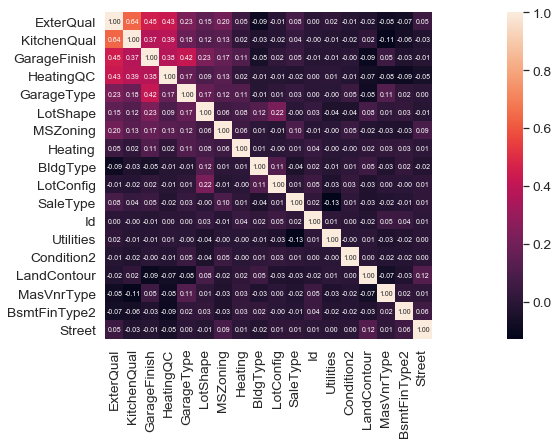

In [525]:
k=18
plt.figure(figsize=(27,6))
correlation_data=df.corr()
col = correlation_data.nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=col.values, xticklabels=col.values)
plt.show()

In [526]:
df.shape[1]

56

In [527]:
df.drop(['GarageType','LotShape','MSZoning','Heating','BldgType','LotConfig','SaleType','Utilities','Condition2'
        ,'LandContour','MasVnrType','BsmtFinType2','Street','BsmtCond'],axis=1,inplace=True)

In [528]:
new_df=df
df.shape[1]

42

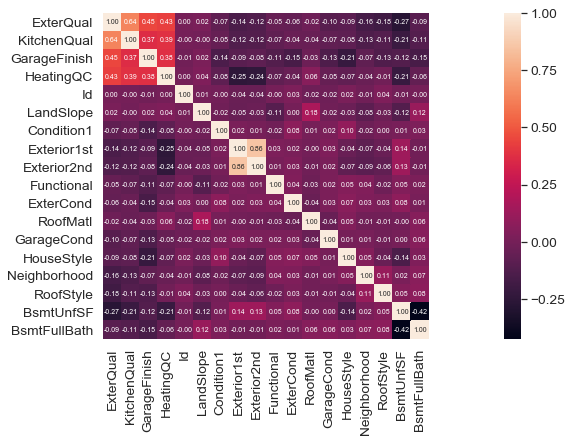

In [529]:
k=18
plt.figure(figsize=(27,6))
correlation_data=df.corr()
cool = correlation_data.nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cool].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cool.values, xticklabels=cool.values)
plt.show()

In [530]:
df.head()

,Id,LotArea,LandSlope,Neighborhood,Condition1,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,1,8450,0,5,2,5,7,2003,2003,1,0,12,13,2,4,2,361,150,179,0,1,4,856,854,1710,1,2,1,2,8,6,0,89,1,2,548,4,2,0,61,4,208500
1,2,9600,0,24,1,2,6,1976,1976,1,0,8,8,3,4,1,482,284,441,0,1,4,1262,0,1262,0,2,0,3,6,6,1,62,1,2,460,4,2,298,0,4,181500
2,3,11250,0,5,2,5,7,2001,2002,1,0,12,13,2,4,2,222,434,214,0,1,4,920,866,1786,1,2,1,2,6,6,1,87,1,2,608,4,2,0,42,4,223500
3,4,9550,0,6,2,5,7,1915,1970,1,0,13,15,3,4,0,66,540,117,2,1,4,961,756,1717,1,1,0,2,7,6,1,84,2,3,642,4,2,0,35,0,140000
4,5,14260,0,15,2,5,8,2000,2000,1,0,12,13,2,4,2,328,490,370,0,1,4,1145,1053,2198,1,2,1,2,9,6,1,86,1,3,836,4,2,192,84,4,250000


In [531]:
df.shape[1]

42

In [532]:
X=df.drop(['SalePrice'],axis=1)
Y=df['SalePrice']

In [533]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

In [534]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [535]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [536]:
prediction=model.predict(x_test)

In [537]:
from sklearn.metrics import mean_squared_log_error
result=np.sqrt(mean_squared_log_error(prediction,y_test))
result

0.19844736167515328

### Random forest

In [538]:
from sklearn.ensemble import RandomForestRegressor


In [539]:
model2=RandomForestRegressor()

In [540]:
model2.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [541]:
prediction=model2.predict(x_test)

In [542]:
result=np.sqrt(mean_squared_log_error(prediction,y_test))
result

0.16308810966131995

### Another approach-Reducing number of row's

In [543]:
df.shape[1]

42

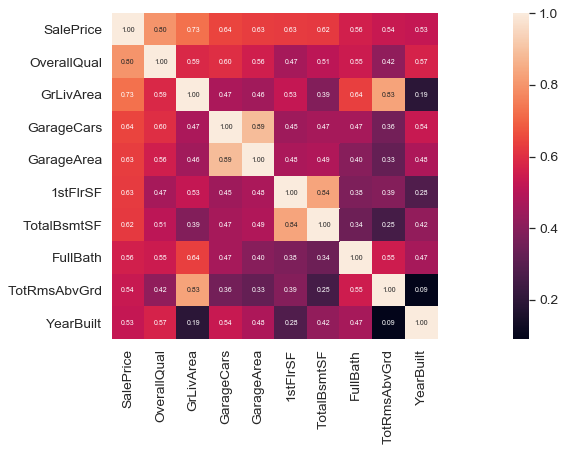

In [544]:
k=10
plt.figure(figsize=(27,6))
correlation_data=df.corr()
col = correlation_data.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=col.values, xticklabels=col.values)
plt.show()

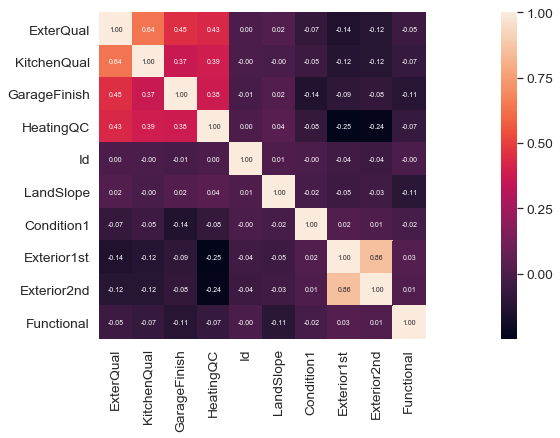

In [545]:
k=10
plt.figure(figsize=(27,6))
correlation_data=df.corr()
col = correlation_data.nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=col.values, xticklabels=col.values)
plt.show()

In [546]:
# Removing these columns
df.drop(['ExterCond','Functional','Exterior1st','Exterior2nd','LandSlope'],axis=1,inplace=True)

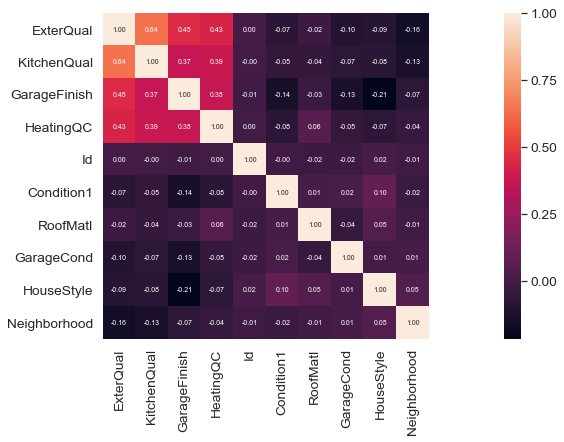

In [547]:
k=10
plt.figure(figsize=(27,6))
correlation_data=df.corr()
col = correlation_data.nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=col.values, xticklabels=col.values)
plt.show()

In [548]:
# Removing these columns
df.drop(['RoofStyle','LotArea','CentralAir','BsmtFullBath','PavedDrive','Electrical','Condition1','Neighborhood','HouseStyle','GarageCond','RoofMatl'],axis=1,inplace=True)

In [549]:
df.head()

,Id,OverallQual,YearBuilt,YearRemodAdd,ExterQual,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,1,7,2003,2003,2,2,361,150,179,0,856,854,1710,2,1,2,8,0,89,1,2,548,0,61,4,208500
1,2,6,1976,1976,3,1,482,284,441,0,1262,0,1262,2,0,3,6,1,62,1,2,460,298,0,4,181500
2,3,7,2001,2002,2,2,222,434,214,0,920,866,1786,2,1,2,6,1,87,1,2,608,0,42,4,223500
3,4,7,1915,1970,3,0,66,540,117,2,961,756,1717,1,0,2,7,1,84,2,3,642,0,35,0,140000
4,5,8,2000,2000,2,2,328,490,370,0,1145,1053,2198,2,1,2,9,1,86,1,3,836,192,84,4,250000


In [550]:
df.shape[1]

26

In [551]:
X=df.drop(['SalePrice'],axis=1)
Y=df['SalePrice']


In [552]:

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.33, random_state=42)


In [553]:

model=RandomForestRegressor(max_depth=10,n_estimators=11)


In [554]:

model.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [555]:

prediction=model.predict(x_test)


In [556]:
from sklearn.metrics import mean_squared_log_error
result=np.sqrt(mean_squared_log_error(prediction,y_test))
result

0.16240769105608255

In [557]:
df.head(4)

,Id,OverallQual,YearBuilt,YearRemodAdd,ExterQual,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,1,7,2003,2003,2,2,361,150,179,0,856,854,1710,2,1,2,8,0,89,1,2,548,0,61,4,208500
1,2,6,1976,1976,3,1,482,284,441,0,1262,0,1262,2,0,3,6,1,62,1,2,460,298,0,4,181500
2,3,7,2001,2002,2,2,222,434,214,0,920,866,1786,2,1,2,6,1,87,1,2,608,0,42,4,223500
3,4,7,1915,1970,3,0,66,540,117,2,961,756,1717,1,0,2,7,1,84,2,3,642,0,35,0,140000


## Kaggle First Attempt

In [558]:
test1=pd.read_csv('test.csv')
test1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [559]:
df.columns

Index(['Id', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'Foundation', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition', 'SalePrice'], dtype='object')

In [560]:
test1=test1[['Id','OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'Foundation', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition']]

In [561]:
df.head()

,Id,OverallQual,YearBuilt,YearRemodAdd,ExterQual,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,1,7,2003,2003,2,2,361,150,179,0,856,854,1710,2,1,2,8,0,89,1,2,548,0,61,4,208500
1,2,6,1976,1976,3,1,482,284,441,0,1262,0,1262,2,0,3,6,1,62,1,2,460,298,0,4,181500
2,3,7,2001,2002,2,2,222,434,214,0,920,866,1786,2,1,2,6,1,87,1,2,608,0,42,4,223500
3,4,7,1915,1970,3,0,66,540,117,2,961,756,1717,1,0,2,7,1,84,2,3,642,0,35,0,140000
4,5,8,2000,2000,2,2,328,490,370,0,1145,1053,2198,2,1,2,9,1,86,1,3,836,192,84,4,250000


In [562]:
# Checking if there is any null value in the data
test1.isnull().any()

Id               False
OverallQual      False
YearBuilt        False
YearRemodAdd     False
ExterQual        False
Foundation       False
BsmtFinSF1        True
BsmtUnfSF         True
TotalBsmtSF       True
HeatingQC        False
1stFlrSF         False
2ndFlrSF         False
GrLivArea        False
FullBath         False
HalfBath         False
KitchenQual       True
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageFinish      True
GarageCars        True
GarageArea        True
WoodDeckSF       False
OpenPorchSF      False
SaleCondition    False
dtype: bool

## Filling all null values

In [563]:
#These are the columns having null values

# KitchenQual       True         GarageYrBlt       True    GarageFinish      True         GarageCars        True
# GarageArea        True         BsmtFinSF1        True    BsmtUnfSF         True         TotalBsmtSF       True

In [564]:
# this has integer value take mode test1.KitchenQual.value_counts()
# this has integer value take mode test1.GarageYrBlt.value_counts()
# this has integer value take mode test1.GarageFinish.value_counts()
# this has integer value take mode test1.GarageCars.value_counts()
#  this has integer values  take mean test1.GarageArea.value_counts()
# this has alot of 0 as values test1.BsmtFinSF1.value_counts()
# this has alot of 0 as values test1.BsmtUnfSF.value_counts()
# take mean test1.TotalBsmtSF.value_counts()

In [565]:
print(test1.KitchenQual.value_counts(),"sum is",test1.KitchenQual.isnull().sum())

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64 sum is 1


In [566]:
#  As above it has only one null value we can fill it with mode
test1.KitchenQual=test1.KitchenQual.fillna('TA')
print(test1.KitchenQual.isnull().sum())

0


In [567]:
test1.GarageYrBlt=test1.GarageYrBlt.fillna(2005.0)
print(test1.GarageYrBlt.isnull().sum())

0


In [568]:
print(test1.GarageFinish.value_counts(),test1.GarageFinish.isnull().sum())

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64 78


In [569]:
#  As above we can take mode in it
test1.GarageFinish=test1.GarageFinish.fillna('Unf')
print(test1.GarageFinish.isnull().sum())

0


In [570]:
print(test1.GarageCars.value_counts(),test1.GarageCars.isnull().sum())

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64 1


In [571]:
# has only one null value we can take it's mode
test1.GarageCars=test1.GarageCars.fillna(2.0)
print(test1.GarageCars.isnull().sum())

0


In [572]:
# print(test1.GarageArea.value_counts(),test1.GarageArea.isnull().sum())
#  as above it has one null value we can take its mean
test1.GarageArea=test1.GarageArea.fillna(test1.GarageArea.mean())
print(test1.GarageArea.isnull().sum())

0


In [573]:
# print(test1.BsmtFinSF1.value_counts(),test1.BsmtFinSF1.isnull().sum())
# As above it has alot of null value
test1.BsmtFinSF1=test1.BsmtFinSF1.fillna(0.0)
print(test1.BsmtFinSF1.isnull().sum())


0


In [574]:
# print(test1.BsmtUnfSF.value_counts(),test1.BsmtUnfSF.isnull().sum())
# Above it has one null value
test1.BsmtUnfSF=test1.BsmtUnfSF.fillna(0.0)
print(test1.BsmtUnfSF.isnull().sum())

0


In [575]:
# print(test1.TotalBsmtSF.value_counts(),test1.TotalBsmtSF.isnull().sum())
x=int(test1.TotalBsmtSF.mean())
test1.TotalBsmtSF=test1.TotalBsmtSF.fillna(x)
print(test1.TotalBsmtSF.isnull().sum())


0


In [576]:

test1.GarageFinish=le.fit_transform(test1.GarageFinish)

test1.SaleCondition=le.fit_transform(test1.SaleCondition)

test1.HeatingQC=le.fit_transform(test1.HeatingQC)

test1.KitchenQual=le.fit_transform(test1.KitchenQual)

test1.ExterQual=le.fit_transform(test1.ExterQual)

test1.Foundation=le.fit_transform(test1.Foundation)


In [577]:
test1.head()
# As this data has no categorical value all have been converted

,Id,OverallQual,YearBuilt,YearRemodAdd,ExterQual,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition
0,1461,5,1961,1961,3,1,468.0,270.0,882.0,4,896,0,896,1,0,3,5,0,1961.0,2,1.0,730.0,140,0,4
1,1462,6,1958,1958,3,1,923.0,406.0,1329.0,4,1329,0,1329,1,1,2,6,0,1958.0,2,1.0,312.0,393,36,4
2,1463,5,1997,1998,3,2,791.0,137.0,928.0,2,928,701,1629,2,1,3,6,1,1997.0,0,2.0,482.0,212,34,4
3,1464,6,1998,1998,3,2,602.0,324.0,926.0,0,926,678,1604,2,1,2,7,1,1998.0,0,2.0,470.0,360,36,4
4,1465,8,1992,1992,2,2,263.0,1017.0,1280.0,0,1280,0,1280,2,0,2,5,0,1992.0,1,2.0,506.0,0,82,4


### Predicting the price

In [578]:
kaggle_prediction=model.predict(test1)

In [579]:
submission_file1 = pd.DataFrame({'Id': test1['Id'], 'SalePrice': kaggle_prediction})
submission_file1.head()

,Id,SalePrice
0,1461,156957.431457
1,1462,163101.573232
2,1463,198014.728184
3,1464,204663.454545
4,1465,237672.545455


In [580]:
submission_file1.to_csv('kaggle-attemt-3.csv')

## Kaggle 2nd submission

In [581]:
from sklearn.linear_model import LinearRegression

In [582]:
model_linear=LinearRegression()

In [583]:
model_linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [584]:
prediction2=model_linear.predict(test1)

In [585]:
submission_file2 = pd.DataFrame({'Id': test1['Id'], 'SalePrice': kaggle_prediction})
submission_file2.head()

,Id,SalePrice
0,1461,156957.431457
1,1462,163101.573232
2,1463,198014.728184
3,1464,204663.454545
4,1465,237672.545455


In [586]:
submission_file2.to_csv('linear.csv')

### Kaggle Submission

In [587]:
# Training more data
X=df.drop(['SalePrice'],axis=1)
Y=df['SalePrice']
model=RandomForestRegressor(max_depth=10,n_estimators=8)

model.fit(X,Y)
prediction=model.predict(test1)


In [588]:
submission_file3 = pd.DataFrame({'Id': test1['Id'], 'SalePrice': prediction})

submission_file3.to_csv('random.csv')

## Another way reducing more number of columns

In [589]:
df.head()

,Id,OverallQual,YearBuilt,YearRemodAdd,ExterQual,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,1,7,2003,2003,2,2,361,150,179,0,856,854,1710,2,1,2,8,0,89,1,2,548,0,61,4,208500
1,2,6,1976,1976,3,1,482,284,441,0,1262,0,1262,2,0,3,6,1,62,1,2,460,298,0,4,181500
2,3,7,2001,2002,2,2,222,434,214,0,920,866,1786,2,1,2,6,1,87,1,2,608,0,42,4,223500
3,4,7,1915,1970,3,0,66,540,117,2,961,756,1717,1,0,2,7,1,84,2,3,642,0,35,0,140000
4,5,8,2000,2000,2,2,328,490,370,0,1145,1053,2198,2,1,2,9,1,86,1,3,836,192,84,4,250000


In [590]:

col = correlation_data.nlargest(15, 'SalePrice')['SalePrice'].index
col

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'GarageYrBlt', 'Foundation', 'BsmtFinSF1'], dtype='object')

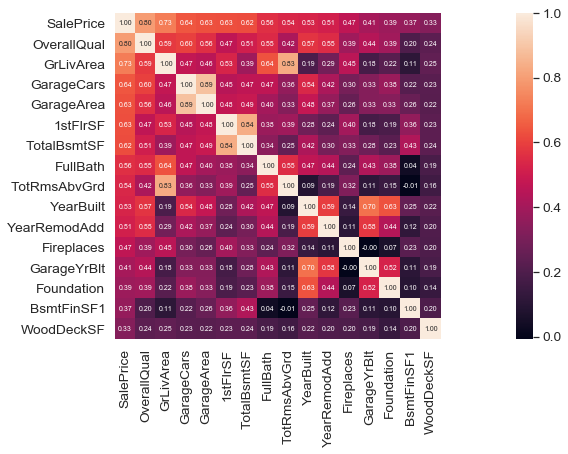

In [591]:
k=18
plt.figure(figsize=(27,6))
correlation_data=df.corr()
col = correlation_data.nlargest(16, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=col.values, xticklabels=col.values)
plt.show()

In [592]:
new_df=df.copy()

In [593]:
new_df=df[['Id','SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'GarageYrBlt', 'Foundation', 'BsmtFinSF1']]

In [594]:
print(new_df.shape[1],df.shape[1])

16 26


In [595]:
model3=RandomForestRegressor(max_depth=10,min_samples_leaf=4)
# Model 4 will have more training
model4=RandomForestRegressor(max_depth=10)
model4.fit(X,Y)
prediction4=model4.predict(test1)

In [596]:
model3.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [597]:
prediction=model3.predict(x_test)

In [598]:
result=np.sqrt(mean_squared_log_error(y_test,prediction))

In [599]:
result

0.16185028527955975

In [600]:
prediction=model3.predict(test1)
submission_file4 = pd.DataFrame({'Id': test1['Id'], 'SalePrice': prediction})

submission_file4.to_csv('random-15.csv')
# By this got a score of 0.24239

In [601]:
new_df.head()

,Id,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,GarageYrBlt,Foundation,BsmtFinSF1
0,1,208500,7,1710,2,548,856,179,2,8,2003,2003,0,89,2,361
1,2,181500,6,1262,2,460,1262,441,2,6,1976,1976,1,62,1,482
2,3,223500,7,1786,2,608,920,214,2,6,2001,2002,1,87,2,222
3,4,140000,7,1717,3,642,961,117,1,7,1915,1970,1,84,0,66
4,5,250000,8,2198,3,836,1145,370,2,9,2000,2000,1,86,2,328


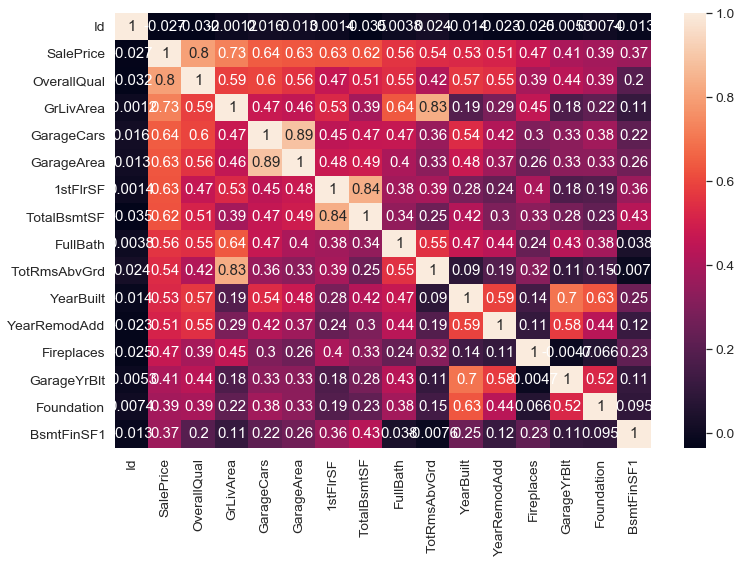

In [602]:
plt.figure(figsize=(12,8))
sns.heatmap(new_df.corr(),annot=True)

In [603]:
new_df.head()

,Id,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,GarageYrBlt,Foundation,BsmtFinSF1
0,1,208500,7,1710,2,548,856,179,2,8,2003,2003,0,89,2,361
1,2,181500,6,1262,2,460,1262,441,2,6,1976,1976,1,62,1,482
2,3,223500,7,1786,2,608,920,214,2,6,2001,2002,1,87,2,222
3,4,140000,7,1717,3,642,961,117,1,7,1915,1970,1,84,0,66
4,5,250000,8,2198,3,836,1145,370,2,9,2000,2000,1,86,2,328


### Doing Regularisation

In [604]:
new_df.head()


,Id,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces,GarageYrBlt,Foundation,BsmtFinSF1
0,1,208500,7,1710,2,548,856,179,2,8,2003,2003,0,89,2,361
1,2,181500,6,1262,2,460,1262,441,2,6,1976,1976,1,62,1,482
2,3,223500,7,1786,2,608,920,214,2,6,2001,2002,1,87,2,222
3,4,140000,7,1717,3,642,961,117,1,7,1915,1970,1,84,0,66
4,5,250000,8,2198,3,836,1145,370,2,9,2000,2000,1,86,2,328


In [605]:
from sklearn import ensemble

In [606]:
gradientbost=ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=10, min_samples_split=10, loss='huber')

In [607]:
gradientbost.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [608]:
gradient_prediction=gradientbost.predict(x_test)

In [609]:
result_gradient=np.sqrt(mean_squared_log_error(gradient_prediction,y_test))
result_gradient

0.14562590448412044

In [610]:
boosting_prediction=gradientbost.predict(test1)

In [611]:
submission_file5 = pd.DataFrame({'Id': test1['Id'], 'SalePrice': boosting_prediction})

submission_file5.to_csv('gradient-ensemble.csv')

In [ ]:
submission_file4 = pd.DataFrame({'Id': test1['Id'], 'SalePrice': prediction4})

submission_file4.to_csv('random-more-training.csv')
# By this got a score of 0.25239

### Reducing again

In [ ]:
df.head(3)

In [ ]:
k=18
plt.figure(figsize=(27,6))
correlation_data=df.corr()
col = correlation_data.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=col.values, xticklabels=col.values)
plt.show()

In [ ]:
col = correlation_data.nlargest(10, 'SalePrice')['SalePrice'].index
col

In [ ]:
final_df=df[['Id','SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]

In [ ]:
final_df.head()

In [ ]:
test2=test1[[ 'Id','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]

In [ ]:
test2.head(4)

In [ ]:
model5= RandomForestRegressor(max_depth=8)

In [ ]:
X=final_df.drop(['SalePrice'],axis=1)

In [ ]:
model5.fit(X,final_df['SalePrice'])

In [ ]:
print(test2.shape[1],final_df.shape[1])

In [ ]:
prediction5=model5.predict(test2)

In [ ]:
submission_file4 = pd.DataFrame({'Id': test2['Id'], 'SalePrice': prediction5})

submission_file4.to_csv('random-more-training5.csv')